In [54]:
%matplotlib inline

In [435]:
info_scores = scores = {
    'right': 0.109109,
    'satire': 0.014451,
    'extreme right': 0.082787,
    'fake news': 0.13344,
    'mixed': 0.201706,
    'low': 0.020118,
    'left': 0.029501,
    'conspiracy': 0.164796,
    'propaganda': 0.068387,
    'extreme left': 0.00309,
    'left-center': 0.040634,
    'hate': 0.011651,
    'center': 0.007294,
    'high': 0.077065,
    'pro-science': 0.000957,
    'very high': 0.001403,
    'right-center': 0.021482
}
nn_scores = {
    'right': 0.033052,
    'satire': 0.003172,
    'extreme right': 0.008892,
    'fake news': 0.017999,
    'mixed': 0.129864,
    'low': 0.1733,
    'left': 0.005643,
    'conspiracy': 0.58503,
    'propaganda': 0.00899,
    'extreme left': 0.000191,
    'left-center': 0.007733,
    'hate': 0.002475,
    'center': 0.001466,
    'high': 0.027105,
    'pro-science': 0.002131,
    'very high': 0.000795,
    'right-center': 0.003194
}
steemit_scores = {
    'right': 0.063293,
    'satire': 0.005306,
    'extreme right': 0.002357,
    'fake news': 0.015981,
    'mixed': 0.205779,
    'low': 0.177397,
    'left': 0.019594,
    'conspiracy': 0.47315,
    'propaganda': 0.016673,
    'extreme left': 0.000951,
    'left-center': 0.024699,
    'hate': 0.00017,
    'center': 0.035536,
    'high': 0.079868,
    'pro-science': 0.020274,
    'very high': 0.047223,
    'right-center': 0.027112
}

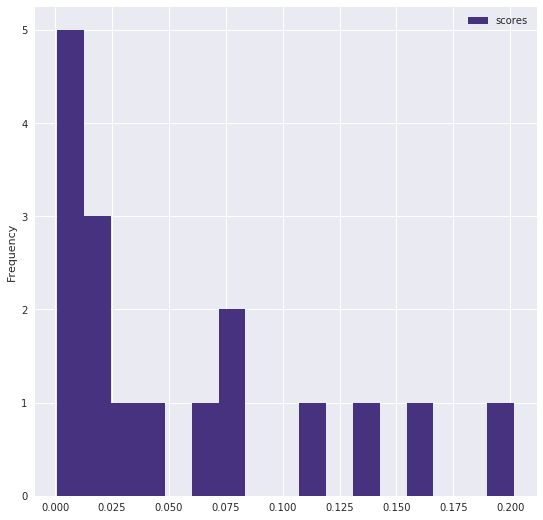

In [403]:
pd.DataFrame({'scores':scores}).plot.hist(bins=17);

In [404]:
pol = ('right', 'right-center', 'extreme right', 'left-center', 'center','extreme left', 'left')
acc = ('low','mixed','high','very high')
char= ('hate','satire','fake news','propaganda','pro-science','conspiracy')
category_dict = {'pol':pol,'acc':acc,'char':char}
dict_category = {v:k for k,v in category_dict.items()}

In [405]:
def label_cleaner(key):
    
    clean = {'mixed':'mixed accuracy',
          'low':'low accuracy'}
    if key in clean:
        
        return clean[key]
    else: return key


In [406]:
highest_scores = sorted(scores.items(),key=lambda kv:kv[1],reverse=True)[:5]

highest_scores = list(zip(*highest_scores))[0]
highest_scores = [label_cleaner(x) for x in highest_scores]
print("This publication scored the highest for {}".format(highest_scores))

This publication scored the highest for ['mixed accuracy', 'conspiracy', 'fake news', 'right', 'extreme right']


In [407]:
def max_scores(cat,vals):
    
    cat_scores = {k:v for k,v in scores.items() if k in vals}
    def get_max():
        return {k:v for k,v in cat_scores.items() if v==max(cat_scores.values()) }
    max_scores = get_max()
    [cat_scores.pop(k) for k in max_scores]
    
    max2_scores = get_max()
    return {cat: [max_scores, max2_scores]}
    

top = [max_scores(cat,vals) for cat,vals in category_dict.items()]
pprint(top)

[{'pol': [{'right': 0.109109}, {'extreme right': 0.082787}]},
 {'acc': [{'mixed': 0.201706}, {'high': 0.077065}]},
 {'char': [{'conspiracy': 0.164796}, {'fake news': 0.13344}]}]


In [408]:
max_all = {k:v for k,v in scores.items() if v==max(scores.values()) }
min_all = {k:v for k,v in scores.items() if v==min(scores.values()) }
range_dict = {}
range_dict.update(min_all)
range_dict.update(max_all)

range_dict

{'mixed': 0.201706, 'pro-science': 0.000957}

In [409]:
import numpy as np

In [410]:
std = np.std(list(scores.values()))
mean = np.mean(list(scores.values()))
median = np.median(list(scores.values()))


In [411]:
mi, ma = range_dict.values()
step = (ma-mi)/4
a,b,c,d = np.arange(mi,ma,step)
a,b,c,d, ma

(0.000957, 0.051144249999999995, 0.10133149999999999, 0.15151875, 0.201706)

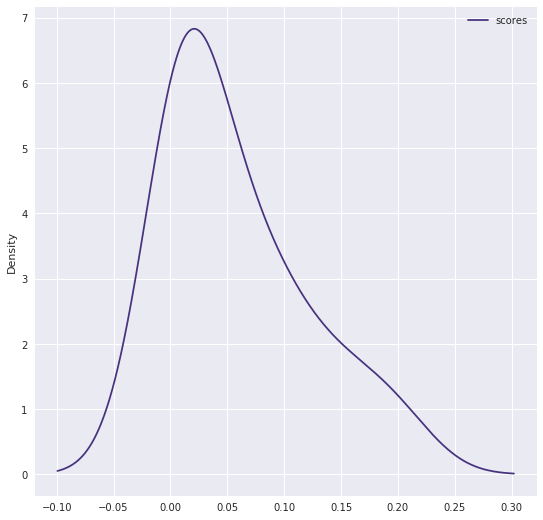

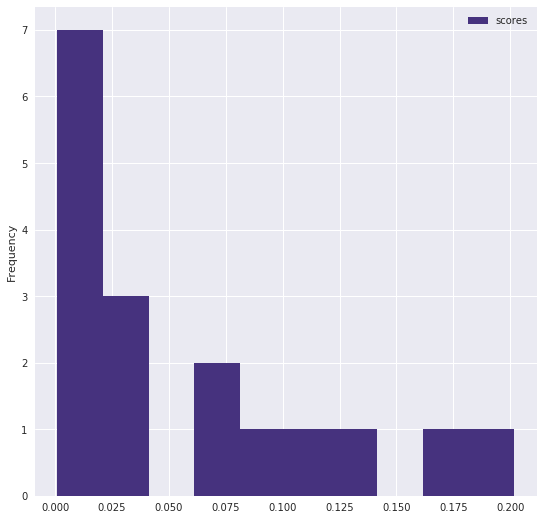

In [412]:
import pandas as pd
pd.DataFrame({'scores':scores}).plot.kde();
pd.DataFrame({'scores':scores}).plot.hist();

{'acc': [{'mixed': 0.201706},
  {'low': 0.020118},
  {'high': 0.077065},
  {'very high': 0.001403}],
 'char': [{'satire': 0.014451},
  {'fake news': 0.13344},
  {'conspiracy': 0.164796},
  {'propaganda': 0.068387},
  {'hate': 0.011651},
  {'pro-science': 0.000957}],
 'pol': [{'right': 0.109109},
  {'extreme right': 0.082787},
  {'left': 0.029501},
  {'extreme left': 0.00309},
  {'left-center': 0.040634},
  {'center': 0.007294},
  {'right-center': 0.021482}]}

In [414]:
acum = {k:[] for k in ['pol','acc','char']}
for top_cat in top:
    for cat, vals in top_cat.items():
        for label_score in vals:
            label, score= [*label_score.items()][0]
            
            if score > d:
                acum[cat].append('very high for ' + label_cleaner(label))
            if d > score > c:
                acum[cat].append('high for ' + label_cleaner(label))
            if c > score > b:
                acum[cat].append('moderate for ' + label_cleaner(label))
#             if b > score > a:
#                 acum[cat].append('low for ' + label)
#             if a > score:
#                 acum[cat].append('very log for ' + label)
# from pprint import pprint
for k,v in accum.items():
    print ()


NameError: name 'accum' is not defined

In [415]:
s = list(zip([1,1,1,1,1,9],range(1,7)))
s2 = [x[0]*x[1] for x in s]
np.mean(s2)-6

5.5

In [416]:
s = list(zip([9,1,9,9,9,9],range(1,7)))
s2 = [x[0]*x[1] for x in s]
np.mean(s2)-6

22.833333333333332

In [436]:

def make_master(score_dict):
    master = {k:[] for k in ['pol','acc','char']}
    for label, score in score_dict.items():
        for labels, cat in dict_category.items():
            if label in labels:

                master[cat].append({label:score})
    return master
        
    
print(master)
def radar_data(score_dict):
    zi = {}
    for d in make_master(score_dict)['char']:
        k, v = list(d.items())[0]
        print(k,v)
        zi.update({k:[v]})

    return zi


si = radar_data(steemit_scores)
iw = radar_data(info_scores)

{'pol': [{'right': 0.109109}, {'extreme right': 0.082787}, {'left': 0.029501}, {'extreme left': 0.00309}, {'left-center': 0.040634}, {'center': 0.007294}, {'right-center': 0.021482}], 'acc': [{'mixed': 0.201706}, {'low': 0.020118}, {'high': 0.077065}, {'very high': 0.001403}], 'char': [{'satire': 0.014451}, {'fake news': 0.13344}, {'conspiracy': 0.164796}, {'propaganda': 0.068387}, {'hate': 0.011651}, {'pro-science': 0.000957}]}
satire 0.005306
fake news 0.015981
conspiracy 0.47315
propaganda 0.016673
hate 0.00017
pro-science 0.020274
satire 0.014451
fake news 0.13344
conspiracy 0.164796
propaganda 0.068387
hate 0.011651
pro-science 0.000957


In [437]:
import matplotlib.pyplot as plt
 
# Get current size

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 9
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

6


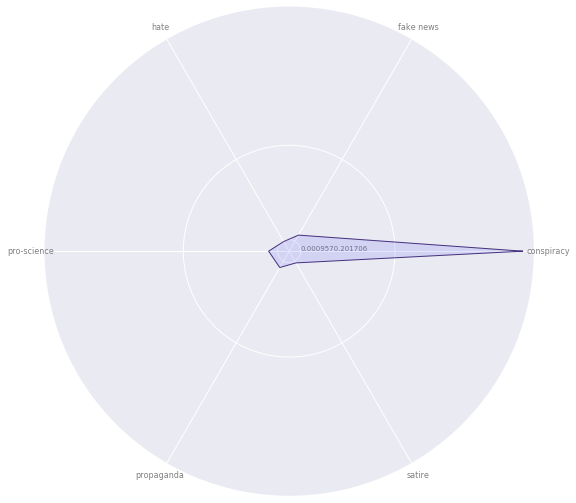

In [439]:
#https://python-graph-gallery.com/390-basic-radar-chart/

# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame(si)
 
# number of variable
categories=list(df)
N = len(categories)
print(N)
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].values.flatten().tolist()
# print(values)
values += values[:1]

 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
sns.set(context='notebook',palette='viridis')
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([mi,ma], [str(mi)+str(ma)], color="grey", size=7)
# plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

